<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Neutral Network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms 
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#Option 1 (create nn modules)
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        self.sigmoid = nn.Sigmoid()
        

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)

        return out

In [ ]:
# Image Classifier Neural Network
class ImageClassifier(nn.Module): 
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, (3,3)), 
            nn.ReLU(),
            nn.Conv2d(32, 64, (3,3)), 
            nn.ReLU(),
            nn.Conv2d(64, 64, (3,3)), 
            nn.ReLU(),
            nn.Flatten(), 
            nn.Linear(64*(28-2)*(28-2), 10)  
        )

    def forward(self, x): 
        return self.model(x)

In [ ]:
model = ImageClassifier()
model

ImageClassifier(
  (model): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=43264, out_features=10, bias=True)
  )
)

In [ ]:
for item in model.state_dict():
    print(f'{item}        size: {model.state_dict()[item].shape}')

model.0.weight        size: torch.Size([32, 3, 3, 3])
model.0.bias        size: torch.Size([32])
model.2.weight        size: torch.Size([64, 32, 3, 3])
model.2.bias        size: torch.Size([64])
model.4.weight        size: torch.Size([64, 64, 3, 3])
model.4.bias        size: torch.Size([64])
model.7.weight        size: torch.Size([10, 43264])
model.7.bias        size: torch.Size([10])


In [ ]:
for param in model.parameters():
    print(param.shape)

torch.Size([32, 3, 3, 3])
torch.Size([32])
torch.Size([64, 32, 3, 3])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([10, 43264])
torch.Size([10])


In [ ]:
for child in model.children():
    print(child)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (3): ReLU()
  (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (5): ReLU()
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=43264, out_features=10, bias=True)
)


In [ ]:
a = 'sadf(asdf(123(123'
a.split('(', 1)

['sadf', 'asdf(123(123']

In [ ]:
# Iterate through each layer in the model
for name, layer in model.named_modules():
    layer_name = str(layer).split('(', 1)[0]
    print(f'[name:{name}] layer:{layer_name}')

[name:] layer:ImageClassifier
[name:model] layer:Sequential
[name:model.0] layer:Conv2d
[name:model.1] layer:ReLU
[name:model.2] layer:Conv2d
[name:model.3] layer:ReLU
[name:model.4] layer:Conv2d
[name:model.5] layer:ReLU
[name:model.6] layer:Flatten
[name:model.7] layer:Linear


In [ ]:
def create_model_diagram(model):
    from nbdevAuto.functions import graph
    from graphviz import Digraph
    dot = graph()
    dot.attr(rankdir='TB')

    for name, layer in model.named_modules():
        layer_name = str(layer).split('(', 1)[0]
        node = f'{name}\n{layer_name}'
        dot.node(node, node)

    for index, (name, layer) in enumerate(model.named_modules()):
        layer_name = str(layer).split('(', 1)[0]
        node = f'{name}\n{layer_name}'
        if index == 0:
            previous = node
            continue    
        
        dot.edge(previous, node)
        previous = node

    # Render the graph
    return dot

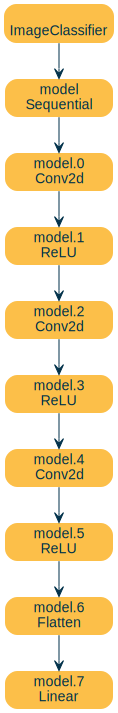

In [ ]:
create_model_diagram(model)

In [ ]:
from torchviz import make_dot

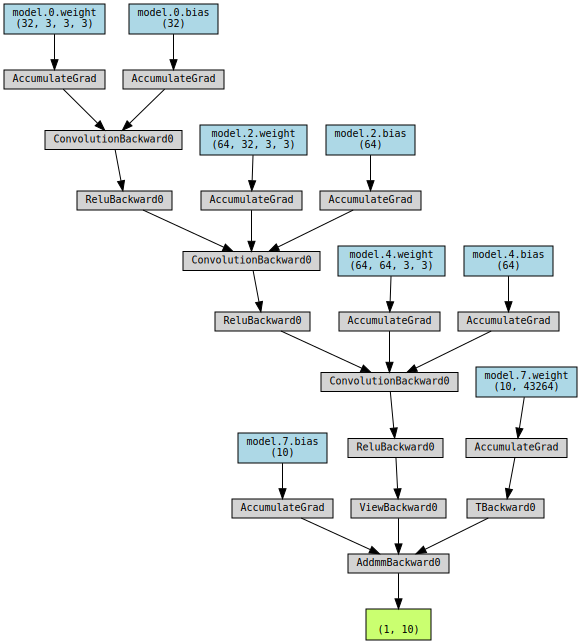

In [ ]:
# Define a dummy input tensor
dummy_input = torch.randn(1, 3, 32, 32)

# Perform a forward pass
output = model(dummy_input)

# Visualize the model's forward structure
# This will create a graph representing the forward pass
graph = make_dot(output, params=dict(model.named_parameters()))
graph

In [ ]:
graph.render("forward_structure", format="png", cleanup=True)

'forward_structure.png'